<a href="https://colab.research.google.com/github/DigvijayPhutane/Netflix_stock_price_prediction/blob/main/Netflix_Stock_Price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [20]:
data = pd.read_csv('NFLX.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-12-16,119.800003,123.000000,118.089996,122.639999,122.639999,13181000
1,2015-12-17,123.970001,126.349998,122.419998,122.510002,122.510002,17284900
2,2015-12-18,120.849998,122.190002,117.919998,118.019997,118.019997,17948100
3,2015-12-21,119.510002,119.589996,115.660004,116.629997,116.629997,11670000
4,2015-12-22,117.300003,117.430000,114.860001,116.239998,116.239998,9689000


In [22]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [23]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1007 non-null   object 
 1   Open       1007 non-null   float64
 2   High       1007 non-null   float64
 3   Low        1007 non-null   float64
 4   Close      1007 non-null   float64
 5   Adj Close  1007 non-null   float64
 6   Volume     1007 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.2+ KB


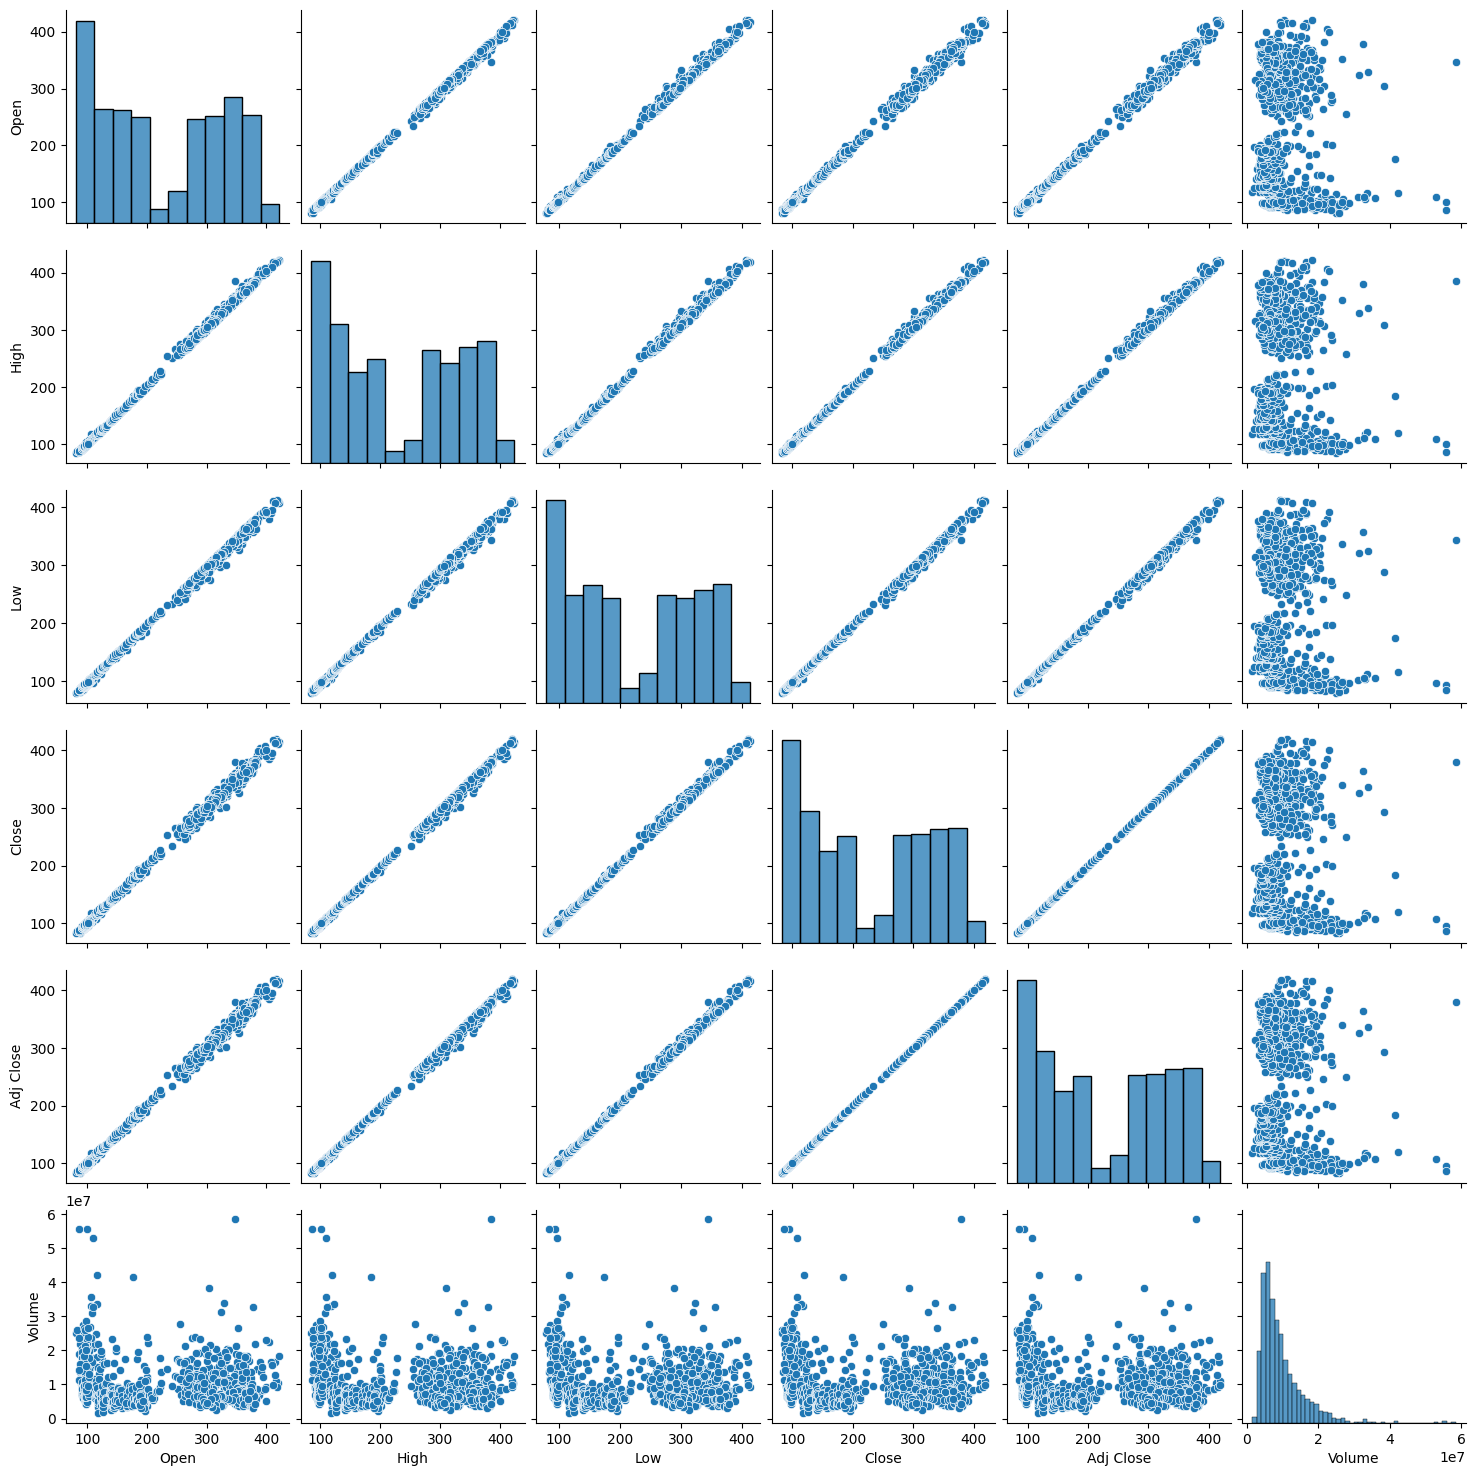

In [21]:
sns.pairplot(data)

In [26]:
#Now we knew that the dataset is almost linear

In [27]:
df = data.copy()

In [28]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [29]:
df.shape #checking shape

(1007, 7)

In [30]:
df.isna().sum() #checking missing data

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [31]:
#feature Selection
features = ['Open','High','Low','Volume','Adj Close']

In [32]:
target = 'Close'

In [35]:
X = df[features]

In [36]:
X[:2]

,Open,High,Low,Volume,Adj Close
0,119.800003,123.000000,118.089996,13181000,122.639999
1,123.970001,126.349998,122.419998,17284900,122.510002


In [37]:
y = df[target]

In [38]:
y[:2]

0    122.639999
1    122.510002
Name: Close, dtype: float64

In [40]:
#split data set into train and test
from sklearn.model_selection import train_test_split

In [41]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2 , random_state = 42)

In [42]:
#lets Standerdise the data
from sklearn.preprocessing import StandardScaler

In [43]:
scaler = StandardScaler()

In [44]:
X_train = scaler.fit_transform(X_train)

In [45]:
X_test = scaler.transform(X_test)

In [47]:
#Applying Linear Regression
from sklearn.linear_model import LinearRegression

In [48]:
lr_model = LinearRegression()

In [49]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [50]:
lr_pred = lr_model.predict(X_test)

In [52]:
lr_model.score(X_train,y_train)*100

100.0

In [53]:
lr_model.score(X_test,y_test)*100

100.0

In [63]:
#applying Suppoert vector Regression
from sklearn.svm import SVR

In [59]:
svr_model = SVR(kernel = 'linear')

In [61]:
svr_model.fit(X_train,y_train)

SVR(kernel='linear')

In [64]:
svr_pred = svr_model.predict(X_test)

In [66]:
#Applying K_nearest neighbors
from sklearn.neighbors import KNeighborsRegressor

In [67]:
knn_model = KNeighborsRegressor(n_neighbors = 5)

In [68]:
knn_model.fit(X_train,y_train)

KNeighborsRegressor()

In [69]:
knn_pred = knn_model.predict(X_test)

In [71]:
#Lets evaluate the models
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [74]:
#Mean Squared Error
lr_mse = mean_squared_error(y_test,lr_pred)
svr_mse = mean_squared_error(y_test,svr_pred)
knn_mse = mean_squared_error(y_test,knn_pred)

In [75]:
print(f'''

Linear Regression MSE : {lr_mse},

Support Vector Regressor MSE : {svr_mse},

K Nearest Neighbors MSE : {knn_mse}

''')



Linear Regression MSE : 2.111460412612153e-27,

Support Vector Regressor MSE : 3.6365078772964807,

K Nearest Neighbors MSE : 40.325761610665694




In [78]:
#Mean Absolute Error
lr_mae = mean_absolute_error(y_test,lr_pred)
svr_mae = mean_absolute_error(y_test,svr_pred)
knn_mae = mean_absolute_error(y_test,knn_pred)

In [79]:
print(f'''

Linear Regression mae : {lr_mae},

Support Vector Regressor mae : {svr_mae},

K Nearest Neighbors mae : {knn_mae}

''')



Linear Regression mae : 3.4471875299252384e-14,

Support Vector Regressor mae : 1.2611841518750353,

K Nearest Neighbors mae : 2.575980391089111




In [81]:
#R2 score
lr_r2 = r2_score(y_test,lr_pred)
svr_r2 = r2_score(y_test,svr_pred)
knn_r2 = r2_score(y_test,knn_pred)

In [82]:
print(f'''

Linear Regression r2 Score : {lr_r2},

Support Vector Regressor r2 Score : {svr_r2},

K Nearest Neighbors r2_Score : {knn_r2}

''')



Linear Regression r2 Score : 1.0,

Support Vector Regressor r2 Score : 0.9996268077527994,

K Nearest Neighbors r2_Score : 0.9958616172153745




In [83]:
# Visualize the predictions (for Linear Regression)

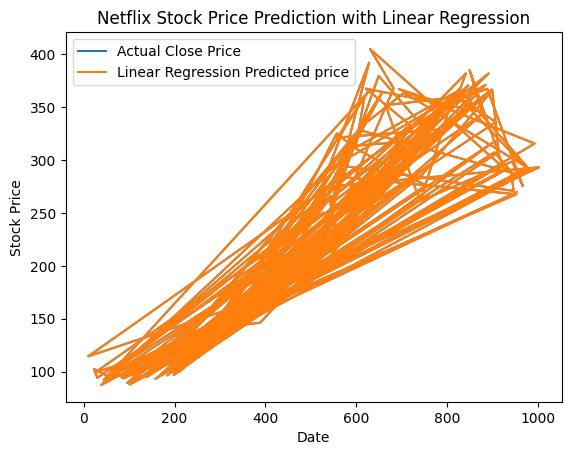

In [86]:
plt.plot(y_test.index,y_test.values,label = "Actual Close Price")
plt.plot(y_test.index,lr_pred,label = 'Linear Regression Predicted price')
plt.legend()
plt.title("Netflix Stock Price Prediction with Linear Regression")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.show()

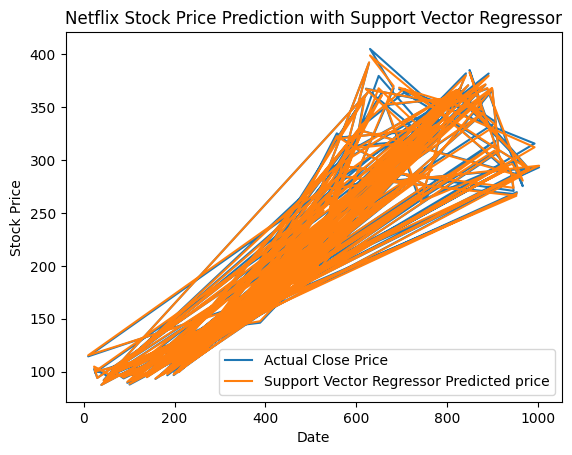

In [87]:
plt.plot(y_test.index,y_test.values,label = "Actual Close Price")
plt.plot(y_test.index,svr_pred,label = 'Support Vector Regressor Predicted price')
plt.legend()
plt.title("Netflix Stock Price Prediction with Support Vector Regressor")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.show()

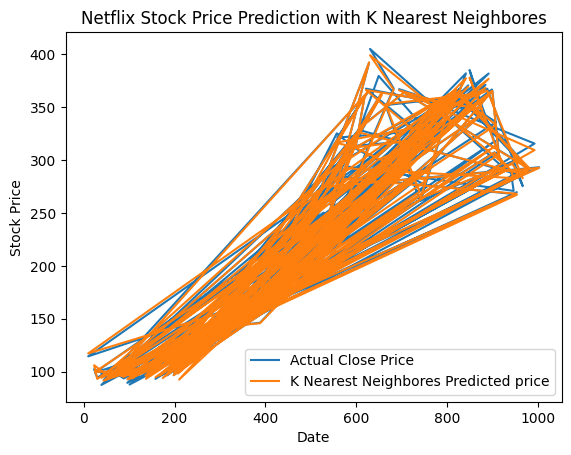

In [88]:
plt.plot(y_test.index,y_test.values,label = "Actual Close Price")
plt.plot(y_test.index,knn_pred,label = 'K Nearest Neighbores Predicted price')
plt.legend()
plt.title("Netflix Stock Price Prediction with K Nearest Neighbores")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.show()

### Conclusion

In this analysis, we applied three different machine learning models to predict Netflix (NFLX) stock prices based on historical data from the 'NFLX.csv' dataset. The models used were Linear Regression, Support Vector Regression (SVM), and K-Nearest Neighbors (KNN). Here are the key takeaways from our analysis:

1. **Linear Regression** provided a relatively simple and interpretable model for stock price prediction. It's a good starting point for this task, and our results demonstrate its ability to capture linear relationships in the data. However, it may not perform as well when the relationships are more complex or non-linear.

2. **Support Vector Regression (SVM)**, with a linear kernel, offered a balance between model complexity and predictive power. It handled non-linear relationships better than simple linear regression and provided competitive results. SVM can be fine-tuned further to improve its performance.

3. **K-Nearest Neighbors (KNN)** demonstrated its ability to capture local patterns in the data. It is particularly useful when relationships in the data are complex, and it adapts well to the local characteristics of the stock prices. The choice of the number of neighbors can impact its performance.